In [11]:
import numpy as np
f = np.array(np.genfromtxt('height_weight.txt'))

print(f)

[[  1.72  77.13]
 [  1.84  86.63]
 [  1.68  77.  ]
 [  1.84  92.38]
 [  1.81  92.13]
 [  1.9  105.13]
 [  1.77  90.5 ]
 [  1.84  88.  ]
 [  1.88  95.5 ]
 [  1.87  99.13]
 [  1.89  93.13]
 [  1.93 108.  ]
 [  1.77  90.25]
 [  1.81 102.63]
 [  1.77  93.88]
 [  1.68  81.38]
 [  1.8   97.88]
 [  1.8  104.63]
 [  1.72  91.88]
 [  1.87 105.88]
 [  1.73  89.5 ]
 [  1.77 100.25]
 [  1.73  70.13]
 [  1.78  74.38]
 [  1.72  75.63]
 [  1.82  79.63]
 [  1.71  65.75]
 [  1.71  74.  ]
 [  1.64  66.63]
 [  1.75  80.38]
 [  1.87  91.  ]
 [  1.81  80.13]
 [  1.81  84.  ]
 [  1.8  109.25]
 [  1.87 123.63]
 [  1.65  95.88]
 [  1.78 101.13]
 [  1.73  98.38]
 [  1.84 181.58]
 [  1.7  101.5 ]
 [  1.75 131.38]
 [  1.78 108.5 ]
 [  1.82 106.  ]
 [  1.73  62.63]
 [  1.86  82.13]
 [  1.71  66.75]
 [  1.81  74.25]
 [  1.74  67.88]
 [  1.7   63.75]
 [  1.84  79.13]
 [  1.75  69.63]
 [  1.72  68.63]
 [  1.87  76.38]
 [  1.71  68.13]
 [  1.83  99.  ]
 [  1.73  90.75]
 [  1.77 100.63]
 [  1.8  101.25]
 [  1.67  89.8

Aufgabe 2

In [12]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

# Create RNG object

rng = np.random.default_rng()

# Create 500 chi2 random variates

rvs = rng.chisquare(df = 5, size = 500)
rvs.min(), rvs.max()


(0.14441581724776623, 18.779634527343724)

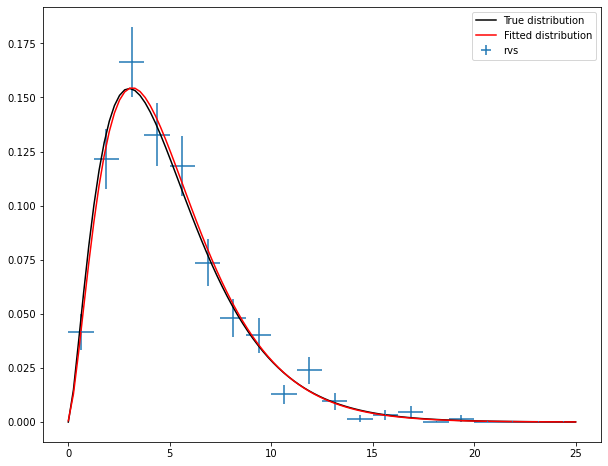

In [13]:
# Define binning and compute bin-width and mid

bin_edges = np.linspace(0,25,21)
bin_width = np.diff(bin_edges)
bin_mids = bin_edges[:-1] + bin_width/2

# Compute the histogram

hist, _ = np.histogram(rvs, bin_edges)

# Compute the norm by 'integration'

norm = bin_width * np.sum(hist)

# Fit the chi2 distribution for task d)

params = chi2.fit(rvs)
params

# Plot everything

x = np.linspace(0,25,100)
plt.figure(figsize=(10,8))
plt.errorbar(x = bin_mids, y = hist/norm, xerr= bin_width/2, yerr = np.sqrt(hist)/norm, fmt = ',', label = 'rvs')

plt.plot(x, chi2(df = 5).pdf(x), 'k-', label = 'True distribution')
plt.plot(x, chi2(*params).pdf(x), 'r-', label = 'Fitted distribution')
plt.legend(loc='best')
